In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")



In [5]:
# reflect an existing database into a new model
base = automap_base()


# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
max_date = session.query(func.max(measurement.date)).first()

max_date

('2017-08-23')

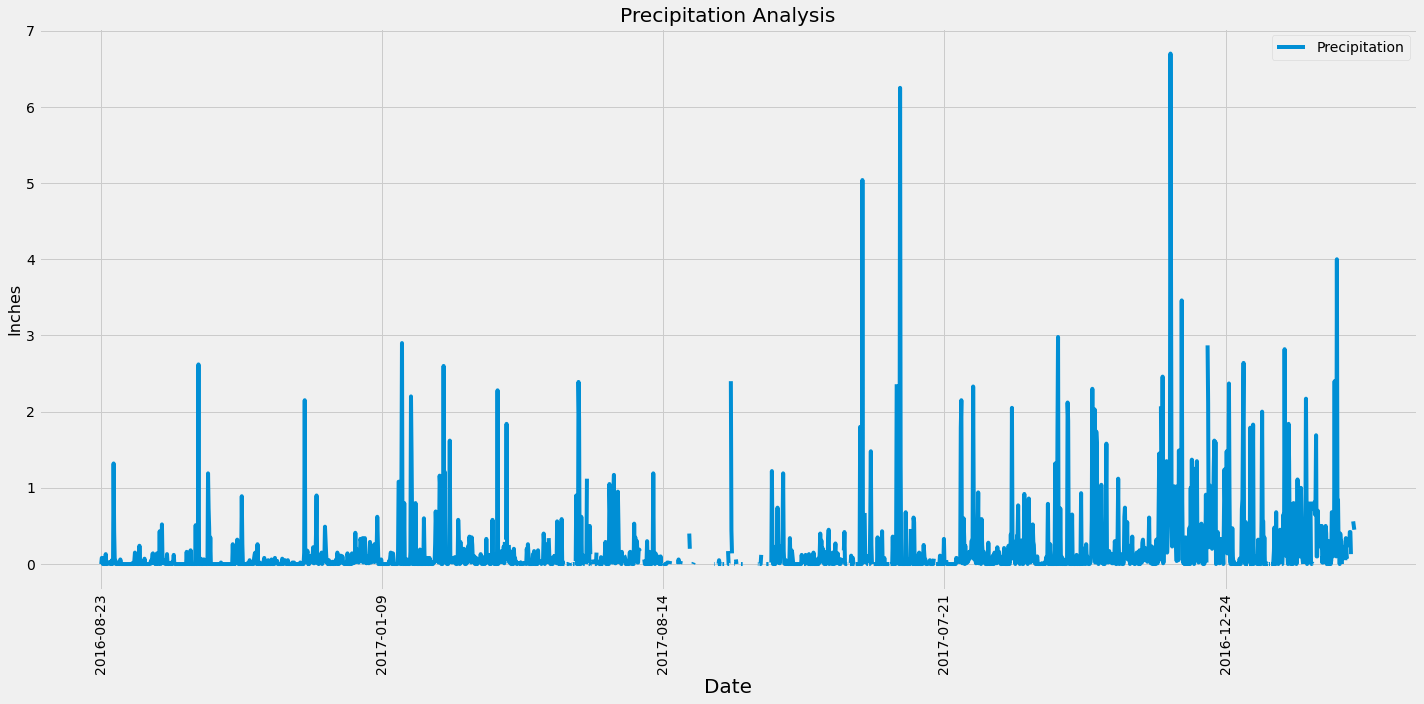

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_data = dt.date(2017,8,23) - dt.timedelta(days = 365)

one_year_data


# Perform a query to retrieve the data and precipitation scores
twl_month_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_data).all()

twl_month_data

# Save the query results as a Pandas DataFrame and set the index to the date column

table = pd.DataFrame(twl_month_data, columns = ['Date', 'Precipitation'] )

table

# Sort the dataframe by date
table.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data

table.plot('Date', 'Precipitation')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Inches", fontsize = 16)
plt.title("Precipitation Analysis" )
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#use describe 

table.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.id).count()

total_stations

9

In [42]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(
    measurement.station).order_by(func.count(measurement.station).desc()).all()

print("Active stations in descending order:")
active_station

Active stations in descending order:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = active_station[0][0]
session.query(func.min(measurement.tobs),func.avg(measurement.tobs), func.max(measurement.tobs)).filter(measurement.station == most_active).all()



[(54.0, 71.66378066378067, 85.0)]

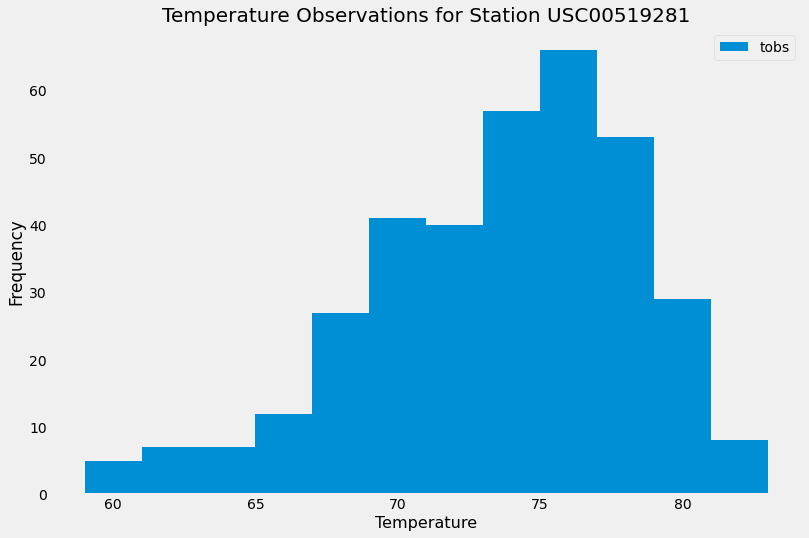

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twlv_month_results = session.query(measurement.station, measurement.tobs).filter(
    measurement.station == most_active).filter(measurement.date >= one_year_data).all()

tobs_df = pd.DataFrame(twlv_month_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + most_active, fontsize=20)
plt.xlabel("Temperature", fontsize=16)
plt.show()

# Close session

In [50]:
# Close Session
session.close()